<a href="https://colab.research.google.com/github/stear0727/-computer/blob/main/%E4%BD%BF%E7%94%A8_9_%E7%A8%AE%E6%A8%A1%E5%9E%8B%E9%A0%90%E6%B8%AC%E5%BF%83%E8%87%9F%E7%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Heart Disease Prediction Using 9 Models 使用 9 種模型預測心臟病
# 資料來源:https://www.kaggle.com/code/fahadrehman07/heart-disease-prediction-using-9-models
# id: 每位患者的唯一識別碼
# age: 患者的年齡（以歲為單位）
# origin: 研究地點
# sex: 性別（男性/女性）
# cp: 胸痛類型（[典型心絞痛, 非典型心絞痛, 非心絞痛, 無症狀]）
# trestbps: 靜息血壓（入院時的血壓，以毫米汞柱（mm Hg）表示）
# chol: 血清膽固醇水平（以毫克/分升（mg/dl）為單位）
# fbs: 空腹血糖（如果空腹血糖 > 120 毫克/分升）
# restecg: 靜息心電圖結果
# 可能值: [正常, ST-T波異常, 左心室肥大]
# thalach: 最大心率達到值
# exang: 運動誘發心絞痛（是/否）
# oldpeak: 運動相對於休息引起的ST段壓低
# slope: 高峰運動ST段的斜率
# ca: 顯影劑染色的主要血管數量（0-3）
# thal: [正常; 固定缺陷; 可逆缺陷]
# num: 預測屬性


In [ ]:
# 1. 處理數據
import pandas as pd  # 用於數據處理和分析
import numpy as np  # 用於數值計算和陣列操作

# 2. 可視化數據
import matplotlib.pyplot as plt  # 用於繪製圖表
import seaborn as sns  # 用於統計數據的可視化
import plotly.express as px  # 用於互動式圖表
from yellowbrick.cluster import KElbowVisualizer  # 用於集群分析中的肘部法則可視化
from matplotlib.colors import ListedColormap  # 用於顏色映射

# 3. 預處理數據
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # 用於數據標準化、正規化和標籤編碼
from sklearn.impute import SimpleImputer, KNNImputer  # 用於數據插補

# 4. 導入迭代插補器
from sklearn.experimental import enable_iterative_imputer  # 啟用迭代插補器的實驗性功能
from sklearn.impute import IterativeImputer  # 用於迭代插補

# 5. 機器學習
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # 用於數據集拆分、參數搜索和交叉驗證

# 6. 用於分類任務
from sklearn.linear_model import LogisticRegression  # 用於邏輯迴歸
from sklearn.neighbors import KNeighborsClassifier  # 用於K近鄰分類
from sklearn.svm import SVC  # 用於支持向量機
from sklearn.tree import DecisionTreeClassifier  # 用於決策樹分類
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestRegressor  # 用於各種集成學習方法
from xgboost import XGBClassifier  # 用於XGBoost分類

# 7. 評估指標
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # 用於評估分類模型的性能

# 8. 忽略警告
import warnings  # 用於處理警告
warnings.filterwarnings('ignore')  # 忽略所有警告


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train/heart_disease_uci.csv")  # 從指定路徑讀取心臟病數據集

# 打印數據框的前5行
df.head()  # 顯示數據框的前5行數據


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# 查看每個欄位的數據類型
df.info()  # 顯示數據框的基本信息，包括欄位名稱、非空值數量和數據類型


# 數據框包含 297 行和 14 個欄位。
# 每個欄位的名稱和數據類型如下：
# age (int64)：年齡
# sex (int64)：性別
# cp (int64)：胸痛類型
# trestbps (int64)：靜息血壓
# chol (int64)：血清膽固醇
# fbs (int64)：空腹血糖
# restecg (int64)：靜息心電圖結果
# thalach (int64)：最大心率
# exang (int64)：運動誘發心絞痛
# oldpeak (float64)：運動引起的ST段壓低
# slope (int64)：峰值運動ST段坡度
# ca (int64)：主要血管數量
# thal (int64)：地中海貧血
# condition (int64)：目標變量（是否患有心臟病）
# 所有欄位都沒有缺失值（非空值數量都是 297）。

# 數據框的記憶體使用量為 32.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# 查看數據形狀
df.shape  # 顯示數據框的行數和列數


(920, 16)

In [ ]:
# age 欄位
df['age'].min(), df['age'].max()  # 顯示 age 欄位的最小值和最大值


(28, 77)

In [ ]:
# 概述 age 欄位
df['age'].describe()  # 顯示 age 欄位的統計摘要

# 執行結果顯示了 age 欄位的統計摘要，包括以下信息：
# count: 297
# 年齡數據的總數為 297 個。
# mean: 54.542088
# 年齡的平均值為 54.54 歲。
# std: 9.049736
# 年齡的標準差為 9.05，表示年齡數據的分散程度。
# min: 29.000000
# 年齡的最小值為 29 歲。
# 25%: 48.000000
# 25% 的數據小於或等於 48 歲，這是第一四分位數。
# 50%: 56.000000
# 50% 的數據小於或等於 56 歲，這是中位數。
# 75%: 61.000000
# 75% 的數據小於或等於 61 歲，這是第三四分位數。
# max: 77.000000
# 年齡的最大值為 77 歲。

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

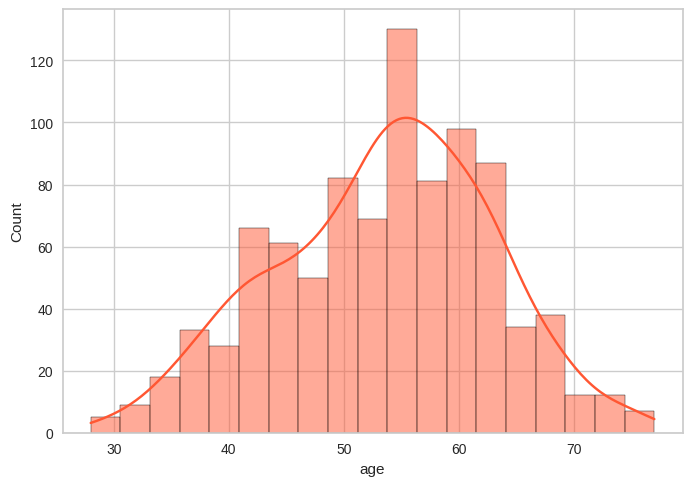

In [ ]:
import seaborn as sns

# 定義自訂顏色
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # 範例顏色，可以根據需要調整

# 使用自訂顏色繪製直方圖
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)  # 繪製帶有核密度估計的年齡直方圖


平均值 53.51086956521739
中位數 54.0
眾數 0    54
Name: age, dtype: int64


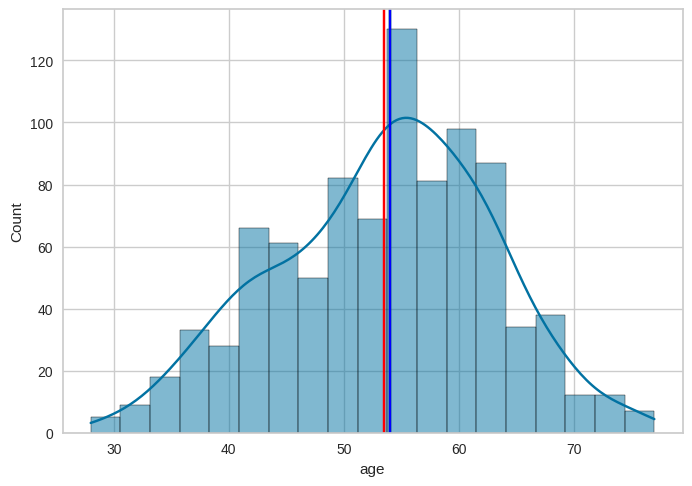

In [ ]:
import seaborn as sns

# 繪製年齡列的直方圖並添加平均值、中位數和眾數
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')  # 添加平均值的垂直線，顏色為紅色
plt.axvline(df['age'].median(), color='Green')  # 添加中位數的垂直線，顏色為綠色
plt.axvline(df['age'].mode()[0], color='Blue')  # 添加眾數的垂直線，顏色為藍色

# 打印年齡列的平均值、中位數和眾數的值
print('平均值', df['age'].mean())
print('中位數', df['age'].median())
print('眾數', df['age'].mode())


In [ ]:
# 使用 plotly 繪製年齡列的直方圖並根據性別著色

import plotly.express as px

fig = px.histogram(data_frame=df, x='age', color='sex')  # 使用 plotly express 創建直方圖，根據性別進行著色
fig.show()  # 顯示圖表

# 這張圖是一個堆疊的條形圖，包含兩組用藍色和紅色表示的數據。
# 水平軸（x軸）的範圍大約從30到70，每隔10有一個標記。
# 垂直軸（y軸）標記為’count’，顯示數據點的頻率，增量看起來是5，範圍高達35。
# 條形圖在x軸上分組，表示每個區間兩組數據的計數。
# 右上角有一個圖例，有兩個條目標記為’I’和’II’，分別對應藍色和紅色的條形。

# 男性（藍色條形）：男性的年齡分佈似乎在30至40歲之間達到高峰，然後逐漸下降。這可能意味著在這個數據集中，男性的主要年齡群體在30至40歲之間。
# 女性（紅色條形）：女性的年齡分佈似乎在30至40歲之間也有一個高峰，但在40至50歲之間的分佈似乎比男性更高。這可能意味著在這個數據集中，女性的主要年齡群體在30至50歲之間。

In [ ]:
# 查找性別列的值
df['sex'].value_counts()  # 計算性別列中每個值的數量


sex
Male      726
Female    194
Name: count, dtype: int64

In [ ]:
# 計算數據中男性和女性的百分比

male_count = 726
female_count = 194

total_count = male_count + female_count

# 計算男性和女性的百分比
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# 顯示結果
print(f'數據中男性的百分比：{male_percentage:.2f}%')  # 顯示男性在數據中的百分比
print(f'數據中女性的百分比：{female_percentage:.2f}%')  # 顯示女性在數據中的百分比

# 計算男性比女性多的百分比差異
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f'男性在數據中比女性多 {difference_percentage:.2f}%')  # 顯示男性比女性多的百分比差異


數據中男性的百分比：78.91%
數據中女性的百分比：21.09%
男性在數據中比女性多 274.23%


In [ ]:
726/194  # 計算男性數量除以女性數量的比率


3.7422680412371134

In [ ]:
# 按性別分組，計算年齡列的值的數量
df.groupby('sex')['age'].value_counts()  # 顯示按性別分組後的年齡值的計數

# 第一列顯示了結果的索引，即性別（0表示女性，1表示男性）和年齡（在這些分組中的特定年齡值）。
# 第二列顯示了每個組合（性別和年齡）中的計數值，即這個年齡值在這個性別中出現的次數。
# 例如，結果中第一行顯示了性別為0（即女性），年齡為62歲的計數為7，表示在數據中有7個女性的年齡是62歲。

# 這種形式的輸出可以幫助分析每個性別中不同年齡段的分佈情況。

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [ ]:
# 列出數據集中所有列的名稱
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# 查找數據集列中的唯一值及其計數
df['dataset'].value_counts()  # 顯示數據集列中每個唯一值的計數

# Cleveland: 有 304 個數據點屬於 Cleveland 數據集。
# Hungary: 有 293 個數據點屬於 Hungary 數據集。
# VA Long Beach: 有 200 個數據點屬於 VA Long Beach 數據集。
# Switzerland: 有 123 個數據點屬於 Switzerland 數據集。

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [ ]:
# 繪製數據集列的計數圖
fig = px.bar(df, x='dataset', color='sex')  # 使用 plotly express 繪製數據集列的計數條形圖，根據性別著色
fig.show()  # 顯示圖表

# 打印按性別分組的數據集列的值
print(df.groupby('sex')['dataset'].value_counts())  # 顯示按性別分組後的數據集列的值計數

# Female：

# Cleveland: 有 97 個數據點屬於 Cleveland 數據集。
# Hungary: 有 81 個數據點屬於 Hungary 數據集。
# Switzerland: 有 10 個數據點屬於 Switzerland 數據集。
# VA Long Beach: 有 6 個數據點屬於 VA Long Beach 數據集。
# Male：

# Hungary: 有 212 個數據點屬於 Hungary 數據集。
# Cleveland: 有 207 個數據點屬於 Cleveland 數據集。
# VA Long Beach: 有 194 個數據點屬於 VA Long Beach 數據集。
# Switzerland: 有 113 個數據點屬於 Switzerland 數據集。
# 這些計數反映了不同性別中各數據集標籤的分佈情況。

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [ ]:
# 使用 plotly 繪製年齡列的直方圖並根據數據集著色
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# 打印按數據集分組後的年齡列的平均值、中位數和眾數
print("___________________________________________________________")
print("數據集的平均值: ", df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print("數據集的中位數: ", df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print("數據集的眾數: ", df.groupby('dataset')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

# count為每個年齡出現的次數
# 根據不同數據集（dataset）分組後的年齡（age）列的統計指標，包括平均值、中位數和眾數。
# 平均值（Mean）：每個數據集的年齡平均值分別是：Cleveland 為 54.35 歲，Hungary 為 47.89 歲，Switzerland 為 55.32 歲，VA Long Beach 為 59.35 歲。
# 中位數（Median）：每個數據集的年齡中位數分別是：Cleveland 為 55.5 歲，Hungary 為 49 歲，Switzerland 為 56 歲，VA Long Beach 為 60 歲。
# 眾數（Mode）：每個數據集的年齡眾數顯示了出現最頻繁的年齡值。在 Cleveland 中最常見的年齡是 58 歲，Hungary 是 54 歲，Switzerland 是 61 歲，VA Long Beach 則是 62 歲和 63 歲。


___________________________________________________________
數據集的平均值:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
數據集的中位數:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
數據集的眾數:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
___________________________________________________________


In [ ]:
# 顯示 "cp" 列中每個值的計數
df['cp'].value_counts()

# asymptomatic（無症狀）: 496例
# non-anginal（非心絞痛性疼痛）: 204例
# atypical angina（非典型心絞痛）: 174例
# typical angina（典型心絞痛）: 46例

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

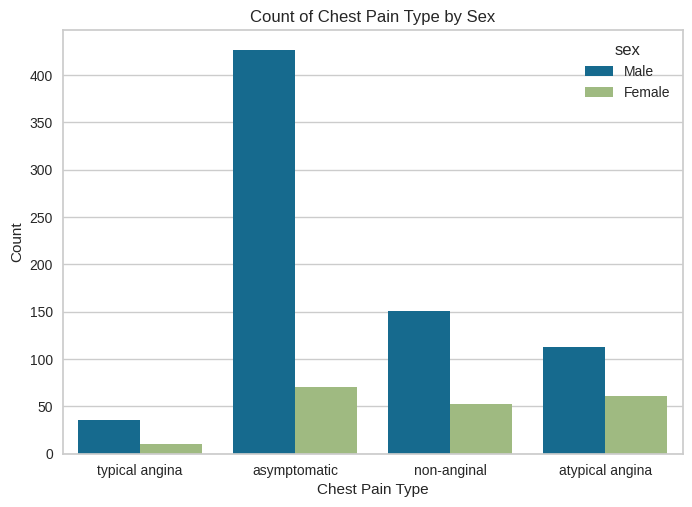

In [ ]:
# 使用 seaborn 繪製 cp 列的計數圖，根據性別著色
sns.countplot(data=df, x='cp', hue='sex')

# 設定 x 軸標籤
plt.xlabel('Chest Pain Type')

# 設定 y 軸標籤
plt.ylabel('Count')

# 設定圖表標題
plt.title('Count of Chest Pain Type by Sex')

# 顯示圖表
plt.show()


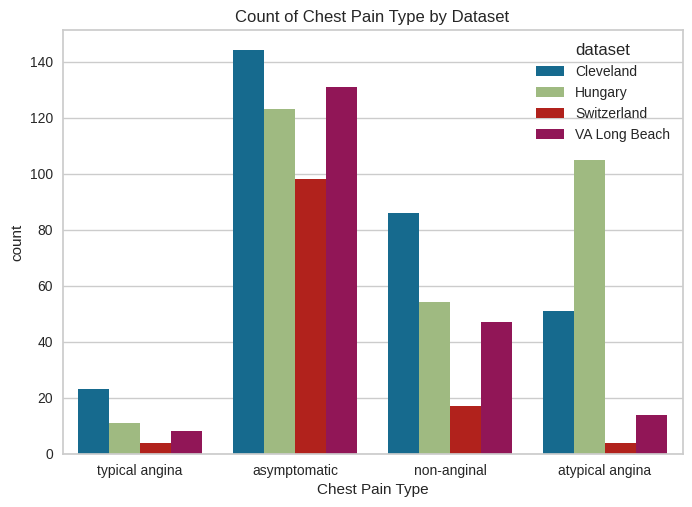

In [ ]:
# 使用 seaborn 繪製 cp 列的計數圖，根據 dataset 列著色
sns.countplot(df, x='cp', hue='dataset')

# 設定 x 軸標籤
plt.xlabel('Chest Pain Type')

# 設定圖表標題
plt.title('Count of Chest Pain Type by Dataset')

# 顯示圖表
plt.show()


In [ ]:
# 使用 plotly 繪製年齡列的直方圖，根據 cp 列著色

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()


In [ ]:
# 輸出 trestbps 列的描述性統計資料
df['trestbps'].describe()

# 統計數據展示了 trestbps（靜息血壓）列的分佈情況：
# count: 非缺失值的數量為 861。
# mean: 平均靜息血壓約為 132.13 mm Hg。
# std: 靜息血壓的標準差大約為 19.07，反映數據的分散程度。
# min: 最小值是 0。
# 25%: 第一四分位數（下四分位數）為 120，即有25%的樣本的靜息血壓低於或等於 120。
# 50%: 中位數為 130，表示有50%的樣本的靜息血壓低於或等於 130。
# 75%: 第三四分位數（上四分位數）為 140，即有75%的樣本的靜息血壓低於或等於 140。
# max: 最大值是 200，顯示數據中最高的靜息血壓值。

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
# 找出 trestbps 列中缺失值的百分比
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")


Percentage of missing values in trestbps column: 6.41%


In [ ]:
# 填補 trestbps 列的缺失值使用迭代填補器

# 創建一個迭代填補器的對象
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# 對 trestbps 列進行擬合
imputer1.fit(df[['trestbps']])

# 轉換數據
df['trestbps'] = imputer1.transform(df[['trestbps']])

# 檢查 trestbps 列中的缺失值
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")


# 迭代填補器是一種用於處理數據集中缺失值的方法，特別適用於需要保持數據特徵間關係的情況。讓我用更簡單的方式來解釋它：

# 問題背景： 假設你有一個數據集，其中某些數據缺失了，比如血壓（trestbps）欄位中的一些值沒有記錄。

# 常見解決方案： 一般來說，缺失值可以用該欄位的平均值或中位數來填補。這樣做簡單，但可能會忽略數據中的複雜模式和相關性。

# 迭代填補器的工作方式：

# 選擇模型： 首先，你需要選擇一個機器學習模型，比如線性回歸或決策樹。
# 訓練模型： 將包含缺失值的特徵作為輸入，其他特徵作為輸出，來訓練這個模型。
# 預測缺失值： 使用已經訓練好的模型來預測缺失值。
# 更新數據： 將這些預測值填充回原始數據集中的缺失位置。
# 迭代過程： 重複這個過程，每次迭代都會根據更新後的數據重新訓練模型，直到填補的值收斂到一個穩定的狀態。
# 好處：

# 保持數據完整性： 通過考慮多個特徵之間的關係，迭代填補器能夠更準確地填補缺失值，從而保持數據的完整性和真實性。
# 適應性強： 與單純的統計方法相比，它更能適應不同數據模式和特徵之間的複雜關係。
# 注意事項：

# 計算成本： 由於每次迭代都需要訓練模型，因此計算成本相對較高，尤其是在大數據集上。
# 模型選擇： 選擇合適的模型對填補效果至關重要，需根據具體情況來調整和優化。


Missing values in trestbps column: 0


In [ ]:
# 找出 trestbps 列中缺失值的百分比
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")


Percentage of missing values in trestbps column: 0.00%


In [ ]:
# 查看資料框架的信息，包括每列的數據類型和非空值數量
df.info()

# 資料框架中每個列的結構信息：
# RangeIndex: 資料框架的索引範圍，從0到919，共有920行資料。
# Data columns: 列出了所有資料列名稱和它們的特性：
# Column: 列名。
# Non-Null Count: 非空值的計數，即該列中有多少非空數據。
# Dtype: 資料類型，指明了該列中數據的類型，如整數 (int64)、浮點數 (float64) 或對象 (object)。
# 具體來說：
# id, age, sex, dataset, cp, trestbps, chol, thalch, oldpeak, num 是數值型列，其中 sex, dataset, cp, fbs, restecg, exang, slope, thal 是對象型列。
# 每列的非空值數量不盡相同，例如 ca, thal 這些列有大量缺失值。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
#查看每個欄位的缺失值
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [ ]:
# 建立迭代填補器的實例
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# 在 'ca', 'oldpeak', 'thal', 'chol' 和 'thalch' 列上進行擬合轉換
df['ca'] = imputer2.fit_transform(df[['ca']])
df['oldpeak'] = imputer2.fit_transform(df[['oldpeak']])
df['chol'] = imputer2.fit_transform(df[['chol']])
df['thalch'] = imputer2.fit_transform(df[['thalch']])


In [ ]:
#查看每個欄位的缺失值
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

In [ ]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")
# 打印出 'thal' 列中的缺失值數量


The missing values in thal column are: 486


In [ ]:
df['thal'].value_counts()  # 計算"thal"列中每個唯一值的出現次數

# thal列有三種主要類別：
# normal（正常）: 出現了196次。
# reversable defect（可逆缺陷）: 出現了192次。
# fixed defect（固定缺陷）: 出現了46次。
# 這意味著數據集中有196個病人的"thal"值為"normal"，192個病人的"thal"值為"reversable defect"，46個病人的"thal"值為"fixed defect"

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [ ]:
df.tail()  # 顯示數據框的最後五行


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.676375,NaN,1


In [ ]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()  # 找出有缺失值的列的名稱，並將其存儲在列表中

missing_data_cols  # 顯示有缺失值的列名稱列表


['fbs', 'restecg', 'exang', 'slope', 'thal']

In [ ]:
# 找出類別型欄位
cat_cols = df.select_dtypes(include='object').columns.tolist()  # 選擇數據類型為 object 的欄位並轉為列表
cat_cols  # 顯示類別型欄位的名稱列表

# 找出數值型欄位
Num_cols = df.select_dtypes(exclude='object').columns.tolist()  # 選擇數據類型不為 object 的欄位並轉為列表
Num_cols  # 顯示數值型欄位的名稱列表

# 打印類別型欄位和數值型欄位的名稱列表
print(f'categorical Columns: {cat_cols}')  # 打印類別型欄位
print(f'numerical Columns: {Num_cols}')  # 打印數值型欄位


categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [ ]:
# 找出類別型欄位
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']  # 定義類別型欄位的名稱列表
bool_cols = ['fbs', 'exang']  # 定義布林型欄位的名稱列表
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']  # 定義數值型欄位的名稱列表

# 布林型欄位（Boolean columns）是只包含兩種值的欄位，通常表示「是」或「否」這種二元狀態。在程式設計和數據處理中，布林型欄位的值通常表示為 True 或 False。
# 在這個心臟病數據集中，fbs 和 exang 這兩個欄位就是布林型欄位：
# fbs：空腹血糖值是否大於 120 mg/dl（是或否）
# exang：運動誘發型心絞痛（是或否）

In [ ]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [ ]:
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

In [ ]:
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

_________________________________________________________________________________________________________________________________________________


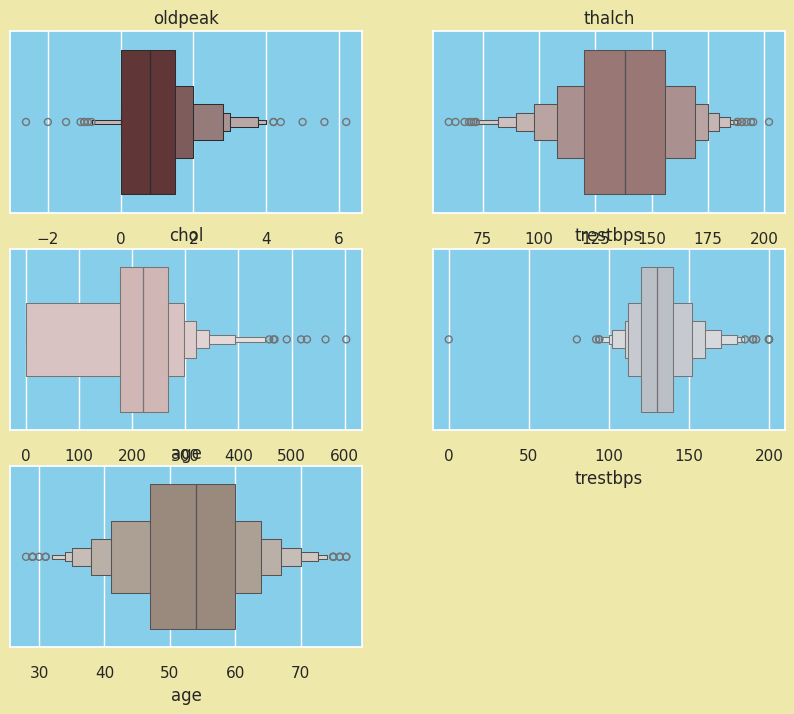

In [ ]:
print("_________________________________________________________________________________________________________________________________________________")

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # 設定圖表背景顏色

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # 使用模數來循環顏色
    plt.title(col)  # 設定子圖標題

plt.show()  # 顯示圖表


In [ ]:
# print the row from df where trestbps value is 0 #從DataFrame df 中找出所有 'trestbps' 欄位值為 0 的列。
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [ ]:
# 移除'trestbps'欄位值為0的行，因為收縮壓不應為0
df = df[df['trestbps'] != 0]


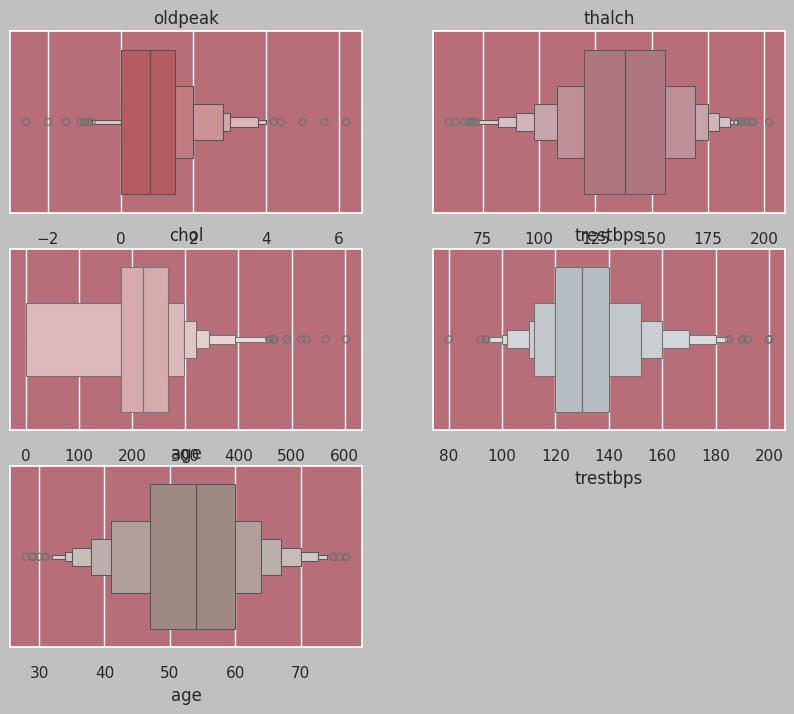

In [ ]:
# 設置圖表背景顏色
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})

# 定義修改後的顏色調色板
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

# 設置圖表大小
plt.figure(figsize=(10,8))

# 繪製箱形圖
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=modified_palette[i % len(modified_palette)])  # 使用取餘數來循環顏色
    plt.title(col)

plt.show()


In [ ]:
df.trestbps.describe()  # 描述 trestbps（靜息血壓）列的統計資訊


count    919.000000
mean     132.276183
std       17.930662
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
df.describe()  # 描述整個資料集的統計資訊


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.276183,199.347019,137.526672,0.878112,0.676375,0.993471
std,265.693391,9.429689,17.930662,108.818455,25.145577,1.054148,0.541962,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.676375,0.000000
50%,460.000000,54.000000,130.000000,221.000000,138.000000,0.800000,0.676375,1.000000
75%,689.500000,60.000000,140.000000,267.000000,156.000000,1.500000,0.676375,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


___________________________________________________________________________________________________________________________________________________________________


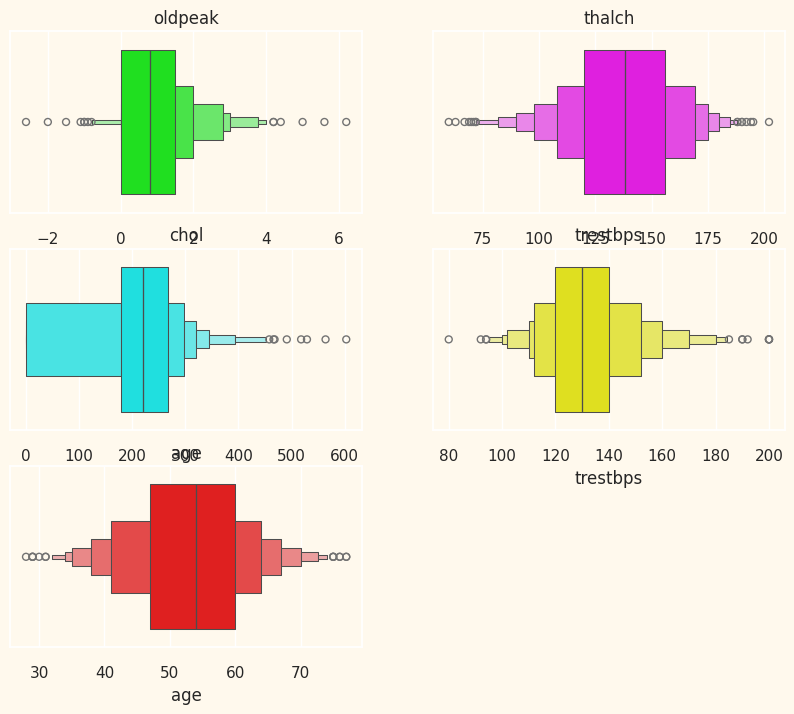

In [ ]:
print("___________________________________________________________________________________________________________________________________________________________________")  # 打印分隔線

# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})  # 設置背景顏色

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]  # 定義"夜視"顏色板

# Use the "night vision" palette for the plots
plt.figure(figsize=(10, 8))  # 設置圖表大小
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(x=df[col], color=night_vision_palette[i % len(night_vision_palette)])  # 使用"夜視"顏色板繪製盒型圖
    plt.title(col)  # 設置標題

plt.show()  # 顯示圖表


In [ ]:
df.age.describe()

count    919.000000
mean      53.509249
std        9.429689
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

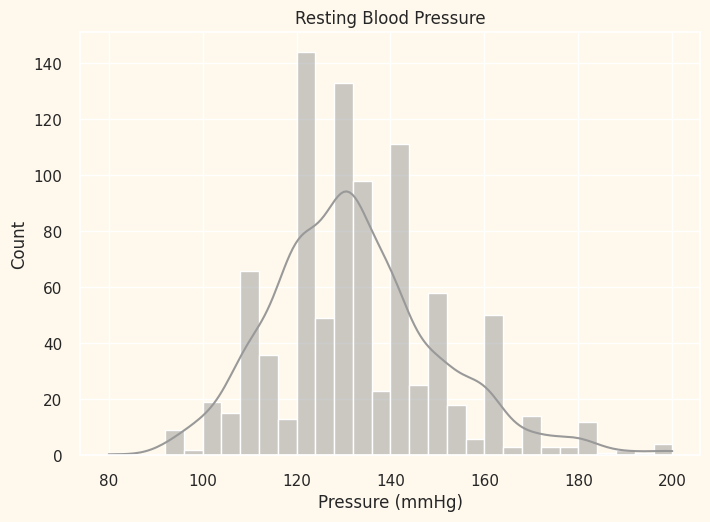

In [ ]:
palette = ["#999999", "#666666", "#333333"]  # 定義顏色板

sns.histplot(data=df,
             x='trestbps',
             kde=True,
             color=palette[0])  # 繪製直方圖並設置顏色

plt.title('Resting Blood Pressure')  # 設置圖表標題
plt.xlabel('Pressure (mmHg)')  # 設置 x 軸標籤
plt.ylabel('Count')  # 設置 y 軸標籤

plt.style.use('default')  # 恢復預設樣式
plt.rcParams['figure.facecolor'] = palette[1]  # 設置圖表背景顏色
plt.rcParams['axes.facecolor'] = palette[2]  # 設置坐標軸背景顏色


<Axes: xlabel='trestbps', ylabel='Count'>

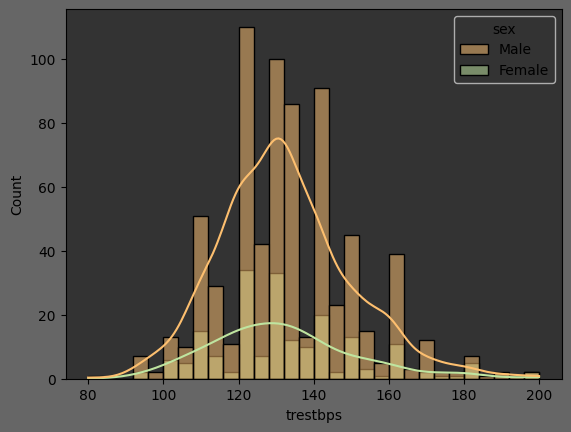

In [ ]:
# 使用 histplot 繪製 trestbps 列的直方圖並與性別列進行分析
sns.histplot(df, x='trestbps', kde=True, palette="Spectral", hue='sex')


In [ ]:
# 使用 info 方法顯示 DataFrame 的資訊
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [ ]:
# 顯示DataFrame中的所有欄位名稱
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# 顯示DataFrame的前5行資料
df.head()  # 取得前5行資料，預設顯示前5行


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Targeted 欄位是 num，它是預測的屬性。我們將使用此列來預測心臟病。此欄位中唯一的數值是：[0,1,2,3,4]，表示有 5 種心臟病。

In [ ]:
# 將資料分為 X 和 y
X = df.drop('num', axis=1)  # X 包含所有特徵，排除 'num' 列
y = df['num']  # y 是目標變數，即 'num' 列

"""使用獨立的標籤編碼器(Label Encoder)對所有類別列進行編碼並保存以供反轉換"""
Label_Encoder = LabelEncoder()

# 對每一列進行標籤編碼
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':  # 檢查列是否為類別型或物件型
        X[col] = Label_Encoder.fit_transform(X[col])  # 使用標籤編碼器進行編碼
    else:
        pass  # 若不是類別型或物件型，則跳過

# 將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# 列出您將用於預測心臟病的所有模型。這些模型應該是多類別分類的分類器。
# logistic regression.
# KNN
# NB
# SVM
# Decision Tree
# Random Forest
# XGBoost
# GradientBoosting
# AdaBoost
# lightGBM

In [ ]:
# 匯入所有模型
from sklearn.linear_model import LogisticRegression  # 邏輯斯迴歸模型
from sklearn.neighbors import KNeighborsClassifier  # K近鄰分類器模型
from sklearn.svm import SVC  # 支持向量機模型
from sklearn.tree import DecisionTreeClassifier, plot_tree  # 決策樹分類器模型、繪圖工具
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # 隨機森林、AdaBoost、梯度提升樹分類器模型
from xgboost import XGBClassifier  # XGBoost 分類器模型
from lightgbm import LGBMClassifier  # LightGBM 分類器模型
from sklearn.naive_bayes import GaussianNB  # 高斯朴素貝葉斯模型

# 匯入流水線工具
from sklearn.pipeline import Pipeline  # 流水線模型建構工具

# 匯入評估指標
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error  # 準確率、混淆矩陣、分類報告、平均絕對誤差、均方誤差等評估指標


In [ ]:
import warnings  # 匯入警告模組

# 忽略警告訊息
warnings.filterwarnings('ignore')  # 忽略所有警告訊息


In [ ]:
# 建立要評估的模型清單
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),  # 邏輯回歸
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),  # 梯度提升樹
    ('KNeighbors Classifier', KNeighborsClassifier()),  # K近鄰分類器
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),  # 決策樹分類器
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),  # AdaBoost分類器
    ('Random Forest', RandomForestClassifier(random_state=42)),  # 隨機森林
    ('XGboost Classifier', XGBClassifier(random_state=42)),  # XGBoost分類器
    ('Support Vector Machine', SVC(random_state=42)),  # 支持向量機
    ('Naive Bayes Classifier', GaussianNB())  # 朴素貝葉斯分類器
]

best_model = None
best_accuracy = 0.0

# 迭代每個模型並評估其表現
for name, model in models:
    # 建立每個模型的流水線
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),  # 可選：填補缺失值
        # ('encoder', OneHotEncoder(handle_unknow='ignore'))  # 可選：編碼類別變數
        ('model', model)  # 模型本身
    ])

    # 進行交叉驗證
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # 計算平均準確率
    mean_accuracy = scores.mean()

    # 在訓練數據上擬合流水線
    pipeline.fit(X_train, y_train)

    # 對測試數據進行預測
    y_pred = pipeline.predict(X_test)

    # 計算準確率分數
    accuracy = accuracy_score(y_test, y_pred)

    # 輸出性能指標
    print("模型", name)
    print("交叉驗證準確率: ", mean_accuracy)
    print("測試準確率: ", accuracy)
    print()

    # 檢查是否為目前最佳模型
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# 檢索最佳模型
print("最佳模型: ", best_model)

# Logistic Regression (邏輯回歸):

# 交叉驗證準確率：51.75%
# 測試準確率：48.91%
# 這個模型在此案例中表現較弱，可能因為數據中存在非線性關係而無法很好地擬合。
# Gradient Boosting (梯度提升樹):

# 交叉驗證準確率：63.60%
# 測試準確率：63.04%
# 梯度提升樹通常能提供較高的準確率，它通過組合多個弱模型來改進預測性能。
# KNeighbors Classifier (K近鄰分類器):
#
# 交叉驗證準確率：57.67%
# 測試準確率：58.70%
# 這個模型根據鄰近的樣本進行預測，表現一般，可能受到特徵縮放和選擇的影響。
# Decision Tree Classifier (決策樹分類器):

# 交叉驗證準確率：58.52%
# 測試準確率：64.13%
# 決策樹在訓練集上表現較好，但容易過擬合。這可能是因為在此案例中，決策樹在測試集上的表現也很好。
# AdaBoost Classifier (AdaBoost分類器):

# 交叉驗證準確率：58.15%
# 測試準確率：60.87%
# AdaBoost通常能提高其他分類器的準確率，但其表現略低於其他複雜模型。
# Random Forest (隨機森林):

# 交叉驗證準確率：63.48%
# 測試準確率：69.57%
# 隨機森林以多棵決策樹為基礎，並在樹的訓練過程中引入隨機性，通常能夠提供良好的泛化能力，這在您的測試集上得到了很好的體現。
# XGBoost Classifier (XGBoost分類器):

# 交叉驗證準確率：63.24%
# 測試準確率：65.22%
# XGBoost是一種梯度提升樹算法的變體，通常能提供很好的表現，但在這裡略低於隨機森林。
# Support Vector Machine (支持向量機):

# 交叉驗證準確率：58.77%
# 測試準確率：58.70%
# SVM通常在較小的數據集上表現良好，但在此案例中表現與其他模型相當。
# Naive Bayes Classifier (朴素貝葉斯分類器):

# 交叉驗證準確率：57.55%
# 測試準確率：54.35%
# 朴素貝葉斯是一種基於簡單假設的快速分類器，但在複雜數據集上表現可能不如其他更強大的算法。

模型 Logistic Regression
交叉驗證準確率:  0.517531945965681
測試準確率:  0.4891304347826087

模型 Gradient Boosting
交叉驗證準確率:  0.6359912376779847
測試準確率:  0.6304347826086957

模型 KNeighbors Classifier
交叉驗證準確率:  0.576736035049288
測試準確率:  0.5869565217391305

模型 Decision Tree Classifier
交叉驗證準確率:  0.5852281854691493
測試準確率:  0.6413043478260869

模型 AdaBoost Classifier
交叉驗證準確率:  0.5815407082876962
測試準確率:  0.6086956521739131

模型 Random Forest
交叉驗證準確率:  0.6348083242059146
測試準確率:  0.6956521739130435

模型 XGboost Classifier
交叉驗證準確率:  0.6323767798466593
測試準確率:  0.6521739130434783

模型 Support Vector Machine
交叉驗證準確率:  0.5877035414384812
測試準確率:  0.5869565217391305

模型 Naive Bayes Classifier
交叉驗證準確率:  0.5755458196422052
測試準確率:  0.5434782608695652

最佳模型:  Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex']  # 定義包含所有類別型欄位的列表


In [ ]:
def evaluate_classification_models(X, y, categorical_columns):
    # 複製 X 以避免修改原始資料
    X_encoded = X.copy()
    label_encoders = {}

    # 使用 LabelEncoder 對類別資料進行編碼
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])

    # 將資料分割為訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # 定義要評估的模型
    models = {
        "Logistic Regression": LogisticRegression(),  # 邏輯回歸模型
        "KNN": KNeighborsClassifier(),  # K最近鄰分類器
        "NB": GaussianNB(),  # 高斯朴素貝葉斯分類器
        "SVM": SVC(),  # 支持向量機
        "Decision Tree": DecisionTreeClassifier(),  # 決策樹分類器
        "Random Forest": RandomForestClassifier(),  # 隨機森林分類器
        "XGBoost": XGBClassifier(),  # XGBoost分類器
        "GradientBoosting": GradientBoostingClassifier(),  # 梯度提升分類器
        "AdaBoost": AdaBoostClassifier()  # AdaBoost分類器
    }

    # 評估每個模型並選擇最佳模型
    results = {}
    best_model = None
    best_accuracy = 0.0
    for name, model in models.items():
        model.fit(X_train, y_train)  # 訓練模型
        y_pred = model.predict(X_test)  # 預測測試集
        accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
        results[name] = accuracy  # 儲存準確率
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name  # 更新最佳模型

    return results, best_model

# 範例使用：
results, best_model = evaluate_classification_models(X, y, categorical_cols)
print("Model accuracies:", results)  # 印出模型準確度
print("Best model:", best_model)  # 印出最佳模型

# Logistic Regression (邏輯回歸): 準確度為 0.489。
# KNN (K最近鄰分類器): 準確度為 0.592。
# NB (高斯朴素貝葉斯分類器): 準確度為 0.543。
# SVM (支持向量機): 準確度為 0.582。
# Decision Tree (決策樹分類器): 準確度為 0.614。
# Random Forest (隨機森林分類器): 準確度為 0.630。
# XGBoost (XGBoost分類器): 準確度為 0.630。
# GradientBoosting (梯度提升分類器): 準確度為 0.658，是所有模型中準確度最高的模型。
# AdaBoost (AdaBoost分類器): 準確度為 0.560。
# 因此，Gradient Boosting 分類器在測試集上的準確度最高，為 0.658，因此被選為最佳模型。這個結果顯示了在這組數據上，Gradient Boosting 模型的性能相對於其他模型更好。

Model accuracies: {'Logistic Regression': 0.4891304347826087, 'KNN': 0.592391304347826, 'NB': 0.5434782608695652, 'SVM': 0.5815217391304348, 'Decision Tree': 0.6141304347826086, 'Random Forest': 0.6304347826086957, 'XGBoost': 0.6304347826086957, 'GradientBoosting': 0.657608695652174, 'AdaBoost': 0.5597826086956522}
Best model: GradientBoosting


In [ ]:
X = df[categorical_cols]  # 選擇類別列作為輸入特徵
y = df['num']  # 選擇 'num' 列作為目標變量


In [ ]:
def hyperparameter_tuning(X, y, categorical_columns, models):
    # 定義字典來存儲結果
    results = {}

    # 編碼類別列
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])

    # 將數據分為訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # 為每個模型進行超參數調優
    for model_name, model in models.items():
        # 定義超參數網格
        param_grid = {}
        if model_name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
            param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
            param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Decision Tree':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'XGBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
        elif model_name == 'GradientBoosting':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
        elif model_name == 'AdaBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}

        # 使用 GridSearchCV 執行超參數調優
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # 獲取最佳超參數並在測試集上評估
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # 將結果存儲在字典中
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

# 定義模型字典
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# 示例用法:
results = hyperparameter_tuning(X, y, categorical_cols, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])  # 最佳超參數
    print("Accuracy:", result['accuracy'])  # 準確度
    print()


# GridSearchCV是Scikit-learn庫中的一個函數，用於系統性地搜尋最佳模型超參數組合的方法。這個函數會自動構建不同超參數組合的模型，並對每一組超參數進行交叉驗證來評估模型的性能。

# 具體來說，GridSearchCV通過以下步驟進行操作：

# 定義參數網格（Parameter Grid）：用戶指定待搜索的超參數範圍。例如，對於支持向量機（SVM）模型，可能指定不同的C值和gamma值。

# 模型選擇：用戶指定要進行超參數調優的機器學習模型。

# 交叉驗證（Cross-Validation）：通常使用K折交叉驗證（K-fold Cross-Validation），將訓練數據分成K個子集，每次使用其中一個子集作為驗證集，其餘作為訓練集，從而進行K次訓練和驗證。

# 模型性能評估：根據指定的性能指標（如準確率、F1分數等），評估每個超參數組合下模型的性能。

# 選擇最佳模型：選擇在交叉驗證中性能最優的超參數組合，這通常是在訓練集上最優化的模型。

# 在測試集上評估：使用選定的最佳模型在獨立的測試集上進行最後的性能評估。

# 總結來說，GridSearchCV可以幫助用戶自動化地找到最佳的模型超參數設置，從而改善機器學習模型的性能。



#這些結果是透過使用 `GridSearchCV` 函數對各個機器學習模型進行超參數調優後得到的。以下是每個模型的解釋：

#1. **Logistic Regression**:
#    - 最佳超參數：{'C': 0.1}
#    - 測試準確率：0.527
#    - Logistic Regression 是一種線性分類器，這裡調整了正則化參數 C，C越小表示正則化強度越大，有助於防止過擬合。

# 2. **KNN (K-Nearest Neighbors)**:
#    - 最佳超參數：{'n_neighbors': 9}
#    - 測試準確率：0.538
#    - KNN 根據鄰近的樣本進行分類，這裡調整了鄰近的鄰居數目。

# 3. **Naive Bayes (NB)**:
#    - 最佳超參數：{'var_smoothing': 1e-09}
#    - 測試準確率：0.473
#    - Naive Bayes 是基於特徵獨立性假設的機器學習方法，這裡調整了方差平滑參數。

# 4. **Support Vector Machine (SVM)**:
#    - 最佳超參數：{'C': 1, 'gamma': 0.1}
#    - 測試準確率：0.522
#    - SVM 是一種二元分類模型，這裡調整了懲罰參數 C 和核函數的gamma參數。

# 5. **Decision Tree**:
#    - 最佳超參數：{'max_depth': 10, 'min_samples_split': 10}
#    - 測試準確率：0.538
#    - 決策樹根據特徵進行分類，這裡調整了樹的最大深度和最小樣本分割數。

# 6. **Random Forest**:
#    - 最佳超參數：{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
#    - 測試準確率：0.565
#    - 隨機森林是基於多棵決策樹進行集成學習的模型，這裡調整了森林中樹的數量和每棵樹的最大深度。

# 7. **XGBoost**:
#    - 最佳超參數：{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
#    - 測試準確率：0.565
#    - XGBoost 是一種提升樹模型，這裡調整了學習率、樹的深度和樹的數量。

# 8. **Gradient Boosting**:
#    - 最佳超參數：{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
#    - 測試準確率：0.549
#    - 梯度提升樹也是一種提升樹模型，這裡調整了學習率、樹的深度和樹的數量。

# 9. **AdaBoost**:
#    - 最佳超參數：{'learning_rate': 0.2, 'n_estimators': 100}
#    - 測試準確率：0.565
#    - AdaBoost 是一種自適應增強學習算法，這裡調整了學習率和基本估算器（即弱分類器）的數量。

# 這些結果顯示了每個模型在最佳超參數設置下的測試準確率。通常來說，通過這種超參數調優的方法，可以使得模型在測試集上表現更好，進而提高整體預測性能。

Model: Logistic Regression
Best hyperparameters: {'C': 0.1}
Accuracy: 0.5271739130434783

Model: KNN
Best hyperparameters: {'n_neighbors': 9}
Accuracy: 0.5380434782608695

Model: NB
Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy: 0.47282608695652173

Model: SVM
Best hyperparameters: {'C': 1, 'gamma': 0.1}
Accuracy: 0.5217391304347826

Model: Decision Tree
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.5380434782608695

Model: Random Forest
Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.5652173913043478

Model: XGBoost
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5652173913043478

Model: GradientBoosting
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5489130434782609

Model: AdaBoost
Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 100}
Accuracy: 0.5652173913043478



In [ ]:
# 1.患心臟病的最低年齡是從28歲開始
# 2.大多數人在53至54歲時患有心臟病
# 3.大多數男性和女性患有心臟病的年齡是 54 至 55 歲
# 4.數據中男性比例：78.91%
# 5.數據中女性比例：21.09%
# 6.數據顯示，男性比女性多274.23%。
# 7.來自克里夫蘭的人數最多（304 人），來自瑞士的人數最少（123 人）。
# 8.此資料集中女性人數最多的是克里夫蘭 (97)，最少的是來自VA 長灘 (6)
# 9.男性人數最多的是匈牙利（212 人），最少的是瑞士（113 人）
# 10.克里夫蘭的典型心絞痛、無症狀和非心絞痛胸痛的發生率很高，而匈牙利的非典型心絞痛的發生率很高
# 11.與其他來源相比，瑞士發生的胸痛（典型心絞痛、無症狀、非心絞痛和非典型心絞痛）數量最少
# 12.發生胸痛次數最多的是無症狀心絞痛，發生次數最少的是典型心絞痛
# 13.典型心絞痛發生率最高的年齡是62至63歲
# 14.無症狀心絞痛發生率最高的年齡是56至57歲
# 15.非心絞痛發生率最高的年齡是54至55歲
# 16.非典型心絞痛發生率最高的年齡是54至55歲